# Multiple Linear Regression

# Import required packages 

In [ ]:
# importing required packages
# data operation libraries

import numpy as np
import pandas as pd
# visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
#plt.style.use('seaborn-white')

## Load Datasets

In [ ]:
dataset = pd.read_csv('dataset/Advertising.csv')

dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
dataset2  = dataset
dataset2

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
dataset.iloc[1,3]

np.float64(45.1)

In [7]:
dataset=dataset2.iloc[:,1:5]
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
dataset4 = dataset.iloc[0:20,:]
dataset4

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [9]:
#subsetting the dataframe
subset = dataset2.iloc[:11, :]
subset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [10]:
## Summary of dataframe contents
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
## See for point summaries or statistical summary
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
#for dispaly the list of columns
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='str')

In [13]:
dataset.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [14]:
## Check whether any column has null entries
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Linearity 

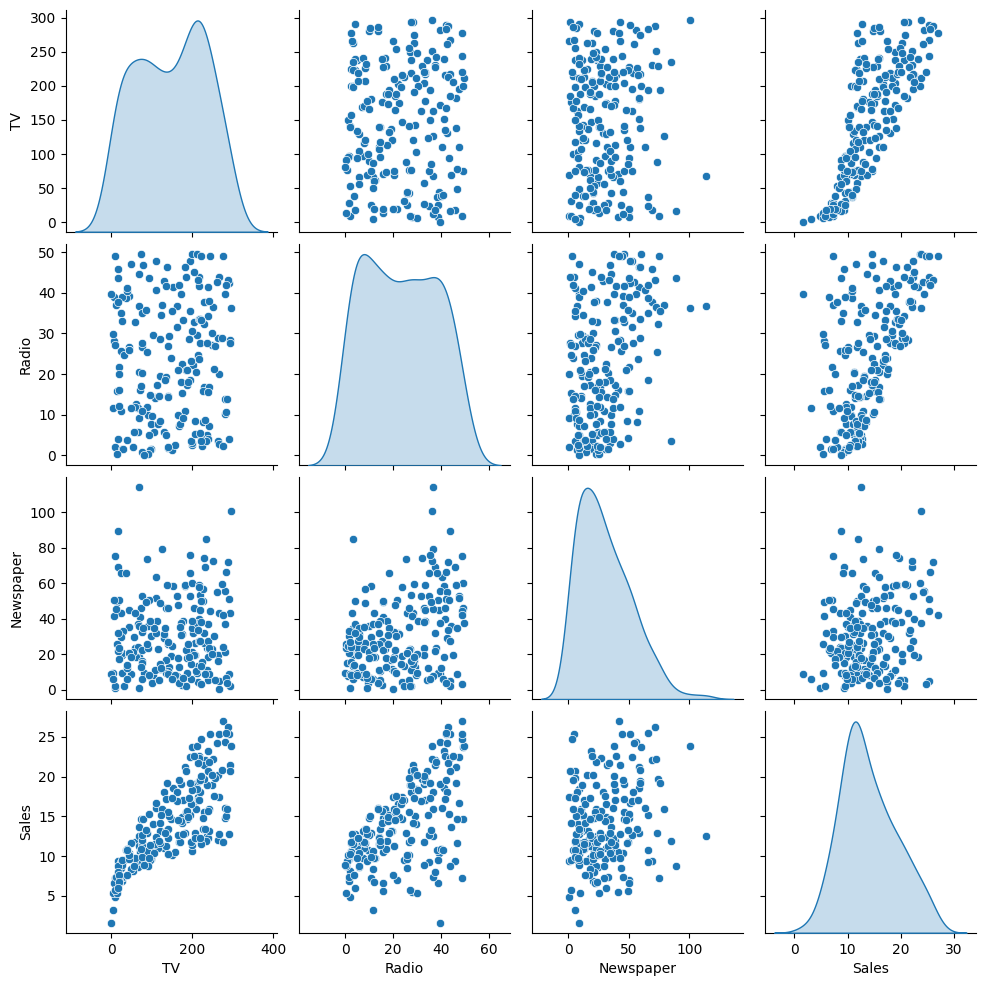

In [15]:
import seaborn as sns
## Check for linearity. We can also draw the pairplot for checking the relationship
sns.pairplot(dataset, diag_kind='kde')

By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape.

A tip is to remember to always see the plots from where the dependent variable is on the y axis. Though it wouldn't vary the shape much but that's how linear regression's intuition is, to put the dependent variable as y and independents as x(s).

### Independance 

In [16]:
corr = dataset.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [17]:
import seaborn as sns

<Axes: >

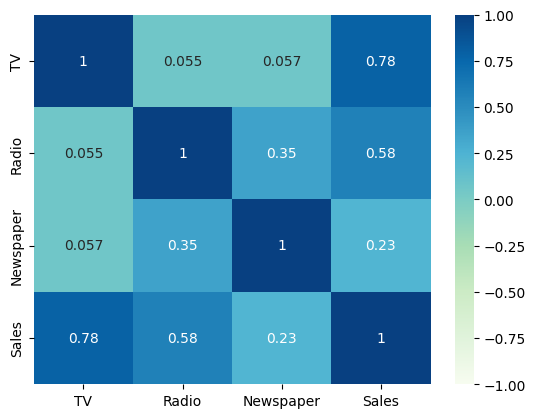

In [18]:
## Check for correlation and draw the heat-map
corr = dataset.corr()
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, cmap='GnBu')

In [19]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Using statsmodels package 

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
est5 = smf.ols('Sales ~ TV + Radio', dataset).fit()
est5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9211,0.294,9.919,0.000,2.340,3.502
TV,0.0458,0.001,32.909,0.000,0.043,0.048
Radio,0.1880,0.008,23.382,0.000,0.172,0.204


In [22]:
est5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 07 Feb 2026   Prob (F-statistic):           4.83e-98
Time:                        12:10:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
est5 = smf.ols('Sales ~ TV + Radio + Newspaper', dataset).fit()
est5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


## With training and testing dataset model building

In [24]:
dataset2

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [25]:
## Prepare the independent dataset
Data = dataset2.drop(['Unnamed: 0', 'Sales'], axis=1)
Data

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
dataset2

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [27]:
## Identify X & Y that is independant and dependant variable directly
X = Data
y = dataset2.Sales

In [28]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [30]:
## Split between train and test 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state = 1)

In [31]:
X_train1

,TV,Radio,Newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


In [32]:
X_test1

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [ ]:
y_train1

In [ ]:
y_test1

In [ ]:
print(X_train1.shape)
print(X_test1.shape)

In [ ]:
print(y_train1.shape)
print(y_test1.shape)

In [33]:
## Prepare model
reg_model = LinearRegression()
reg_model.fit(X_train1, y_train1)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Interpret the result

The output of the code will give us the intercept, coefficient, and R-squared value of the linear regression model. The intercept represents the value of sales when advertising is zero, while the coefficient tells us the change in sales for each unit increase in advertising. The R-squared value indicates how well the linear regression model fits the data

In [34]:
reg_model.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [35]:
for i in enumerate(X_train1.columns):
    print(i)

(0, 'TV')
(1, 'Radio')
(2, 'Newspaper')


In [36]:
X_train1.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='str')

In [37]:
#enumerate return a tuple of the index and value for each element.
for idx, col_name in enumerate(X_train1.columns):
    #print(idx)
    print("Coefficeint of {} is {}".format(col_name, reg_model.coef_[idx]))

Coefficeint of TV is 0.04695204776848465
Coefficeint of Radio is 0.1765864352681737
Coefficeint of Newspaper is 0.0018511533188921958


In [ ]:
print("Coefficient: ", reg_model.coef_)

In [ ]:
print("Intercept: ", reg_model.intercept_)

In [38]:
### Check the scores over training data score() method calculats the r2 -coefficient of determination.
#the score method in scikit-learn internally calculates the predicted values
reg_model.score(X_train1, y_train1)

0.8850053786777522

Now from the intercept and coefficients calculated from the training data, we can write the regresssion equation as:

 
## 𝑆𝑎𝑙𝑒𝑠=2.937  +  0.046×TV  +  0.176×𝑅𝑎𝑑𝑖𝑜  +  0.001×𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟

In [39]:
X_test1

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [40]:
y_predict = reg_model.predict(X_test1)
y_predict

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

In [41]:
X_test1

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [42]:
#To caclulate the test score
#the score method in scikit-learn internally calculates the predicted values
score = reg_model.score(X_test1, y_test1)
print("R² score:", score)

R² score: 0.9224605706201434


In [ ]:
 
## 𝑆𝑎𝑙𝑒𝑠=2.937  +  0.046×700  +  0.176×800  +  0.001×300

In [43]:
# Test the model
# suppose you want to predict the sales value for the tv=700,radio=800 and newspaper=300
test_input =[[700,800,300]]
print(f'Predicted sales for advertising expenses of 700,800,300: {reg_model.predict(test_input)}')


Predicted sales for advertising expenses of 700,800,300: [177.62814338]


/Users/pratikpanchal/Documents/iitd-aiml/Practices/mathsfoundation/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Multiple Linear Regression with Interaction

## TV alone as a predictor

In [44]:
est_fin_tv = smf.ols('Sales ~ TV ', dataset).fit()
est_fin_tv.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [45]:

p_value_F = est_fin_tv.f_pvalue
# Get R-squared
R_squared = est_fin_tv.rsquared
# Get Adjusted R-squared
R_squared_adj = est_fin_tv.rsquared_adj


print("p-value:", p_value_F)
print("R-squared:", R_squared)
print("Adjusted R-squared:", R_squared_adj)

p-value: 1.4673897001946263e-42
R-squared: 0.611875050850071
Adjusted R-squared: 0.6099148238341623


# TV and Radio as predictors

In [46]:
est_fin_tr = smf.ols('Sales ~ TV + Radio ', dataset).fit()
est_fin_tr.summary().tables[1]
print("Summary")
print(est_fin_tr.summary().tables[1])


p_value_F = est_fin_tr.f_pvalue
# Get R-squared
R_squared = est_fin_tr.rsquared
R_squared_adj = est_fin_tr.rsquared_adj


print("p-value:", p_value_F)
print("R-squared:", R_squared)
print("Adjusted R-squared:", R_squared_adj)

Summary
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
p-value: 4.82736185133545e-98
R-squared: 0.8971942610828956
Adjusted R-squared: 0.8961505479974428


# TV, Radio and Newspaper

In [47]:
est_fin_all = smf.ols('Sales ~ TV + Radio + Newspaper ', dataset).fit()
est_fin_all.summary().tables[1]
print("Summary")
print(est_fin_all.summary().tables[1])

# Statistical Inference Metrics
p_value_F = est_fin_all.f_pvalue
# Get R-squared
R_squared = est_fin_all.rsquared
R_squared_adj = est_fin_all.rsquared_adj


print("p-value:", p_value_F)
print("R-squared:", R_squared)
print("Adjusted R-squared:", R_squared_adj)

Summary
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
p-value: 1.575227256092433e-96
R-squared: 0.8972106381789522
Adjusted R-squared: 0.8956373316204668


In [48]:
est_fin = smf.ols('Sales ~ TV + Radio + Newspaper ', dataset).fit()
est_fin.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


## MLR with interaction

In the Advertising data, we assumed that the effect on sales of increasing one advertising medium is independent of the amount spent on the other media.
Interaction effect states that when an increase on the radio budget affects the effectiveness of the TV spending on sales. 

In [49]:
dataset["Radio"]

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

In [50]:
# Create an interaction term between TV and Radio
dataset["TV_Radio_Interaction"] = dataset["TV"] * dataset["Radio"]
dataset

,TV,Radio,Newspaper,Sales,TV_Radio_Interaction
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,141.34
196,94.2,4.9,8.1,9.7,461.58
197,177.0,9.3,6.4,12.8,1646.10
198,283.6,42.0,66.2,25.5,11911.20


In [51]:
# Define the independent variables (predictors)
X = dataset[["TV", "Radio", "Newspaper", "TV_Radio_Interaction"]]
X

,TV,Radio,Newspaper,TV_Radio_Interaction
0,230.1,37.8,69.2,8697.78
1,44.5,39.3,45.1,1748.85
2,17.2,45.9,69.3,789.48
3,151.5,41.3,58.5,6256.95
4,180.8,10.8,58.4,1952.64
...,...,...,...,...
195,38.2,3.7,13.8,141.34
196,94.2,4.9,8.1,461.58
197,177.0,9.3,6.4,1646.10
198,283.6,42.0,66.2,11911.20


In [52]:
# Define the dependent variable (response)
y = dataset["Sales"]

In [53]:
est = smf.ols('Sales ~ TV + Radio +TV_Radio_Interaction', dataset).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV_Radio_Interaction,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [54]:
#Statistical Inference Metrics
p_value_F = est.f_pvalue
# Get R-squared
R_squared = est.rsquared
R_squared_adj = est.rsquared_adj

print("p-value:", p_value_F)
print("R-squared:", R_squared)
print("Adjusted R-squared:", R_squared_adj)

p-value: 6.684246516860898e-146
R-squared: 0.9677905498482523
Adjusted R-squared: 0.9672975480602154


The model including the interaction term is superior to the model that contains only main effects. 